Generating new samples (unlabeled) as a mixup of existing samples
. i am taking two random samples from the entire dataset of 50k, using a lambda chosen from a beta distribution and then adding them using the lambda formula mentioned in the paper. In an extreme case of lamda, the resulting y will still be one-hot, in which case mix up did not happen. I am discarding these and generating 50k mixed up images. Let these be called as unlabeled data for mixup.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import random
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [0]:
ROOT = '/content/drive/My Drive/19 Fall/CSE 569/Project/cifar/labeled'

In [4]:
_X = []
_y = []
for i in range(10):
  _X.append(pickle.load(open(ROOT + '/X_train_label' + str(i), mode='rb')))
  _y.append(pickle.load(open(ROOT + '/y_train_label' + str(i), mode='rb')))
  print(i, _X[i].shape, _y[i].shape)

X_labeled = np.vstack(_X)
y_labeled = np.vstack(_y)

print(X_labeled.shape, y_labeled.shape)

0 (5000, 32, 32, 3) (5000, 10)
1 (5000, 32, 32, 3) (5000, 10)
2 (5000, 32, 32, 3) (5000, 10)
3 (5000, 32, 32, 3) (5000, 10)
4 (5000, 32, 32, 3) (5000, 10)
5 (5000, 32, 32, 3) (5000, 10)
6 (5000, 32, 32, 3) (5000, 10)
7 (5000, 32, 32, 3) (5000, 10)
8 (5000, 32, 32, 3) (5000, 10)
9 (5000, 32, 32, 3) (5000, 10)
(50000, 32, 32, 3) (50000, 10)


In [5]:
N = len(X_labeled)
alpha = 0.2
print(N, alpha)

50000 0.2


In [6]:
lambdaa = np.random.beta(alpha, alpha, N)
X_lambdaa = lambdaa.reshape(N, 1, 1, 1)
y_lambdaa = lambdaa.reshape(N, 1)
print(X_lambdaa.shape, y_lambdaa.shape)

(50000, 1, 1, 1) (50000, 1)


In [0]:
X_unlabeled = np.zeros((N, 32, 32, 3))
y_unlabeled = np.zeros((N, 10))

In [0]:
for i in range(N):
  while True:
    r = random.sample(range(0, 50000), 2)
    X_l = X_lambdaa[r[0]]
    X = X_labeled[r[0]] * X_l + X_labeled[r[1]] * (1 - X_l)
    y_l = y_lambdaa[r[0]]
    # print(X_l, y_l)
    y = y_labeled[r[0]] * y_l + y_labeled[r[1]] * (1 - y_l)
    if np.max(y) > 0.9:
      # extreme lambda case, y is still hot! or skewed
      continue
    else:
      X_unlabeled[i] = X
      y_unlabeled[i] = y
      break

In [20]:
# Check if balanced
np.sum(y_unlabeled, 0) * 10 / N

array([0.99191209, 0.987092  , 1.00895467, 1.00583143, 1.01415094,
       0.99214633, 0.99163761, 1.00687206, 0.99432396, 1.00707891])

In [0]:
pickle.dump(X_unlabeled, open(ROOT + '/X_train_MixUp', mode='wb'))
pickle.dump(y_unlabeled, open(ROOT + '/y_train_MixUp', mode='wb'))

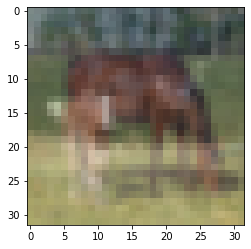

One-hot label: [0.         0.         0.         0.         0.52348377 0.
 0.         0.47651623 0.         0.        ]


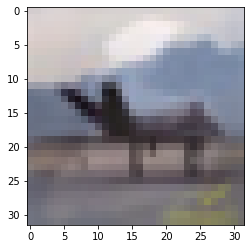

One-hot label: [0.83864795 0.         0.         0.         0.         0.16135205
 0.         0.         0.         0.        ]


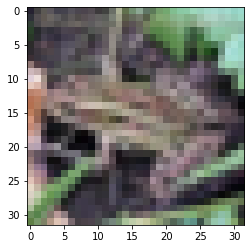

One-hot label: [0.         0.         0.         0.12818217 0.         0.
 0.87181783 0.         0.         0.        ]


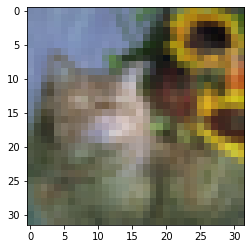

One-hot label: [0.         0.         0.         0.70302646 0.29697354 0.
 0.         0.         0.         0.        ]


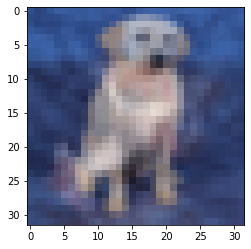

One-hot label: [0.31265674 0.         0.         0.         0.         0.68734326
 0.         0.         0.         0.        ]


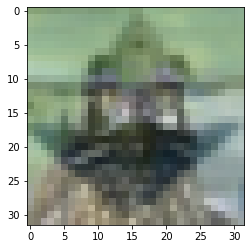

One-hot label: [0.46724469 0.         0.         0.         0.         0.
 0.53275531 0.         0.         0.        ]


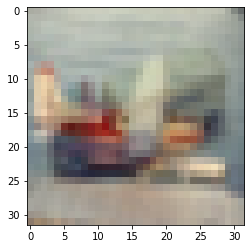

One-hot label: [0.62042142 0.         0.         0.         0.         0.
 0.         0.         0.         0.37957858]


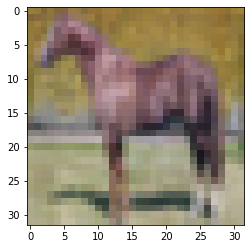

One-hot label: [0.         0.         0.         0.         0.         0.
 0.         0.84667665 0.         0.15332335]


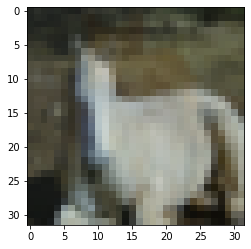

One-hot label: [0.         0.         0.         0.18123836 0.         0.
 0.         0.81876164 0.         0.        ]


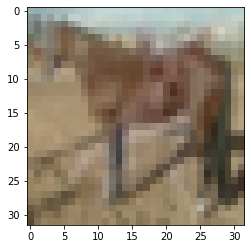

One-hot label: [0.        0.        0.        0.        0.        0.3050691 0.
 0.6949309 0.        0.       ]


In [22]:
for i in range(10):
    curr_img = X_unlabeled[i, :]
    plt.imshow(curr_img)
    plt.show()
    print("One-hot label:", y_unlabeled[i, :])